# Proyecto Mineria de Datos

## Integrantes

- Ignacio Basualto
- Raimundo Vicente
- Renato Cerda
- Sebastián Bustos	
- Diego Olguín

# Tabla de contenidos

1. [Eleccion de base de datos](#1)
2. [Motivación](#2)
3. [Exploración de datos](#3)
    
    * [Preprocesamiento](#3.1)
    * [Exploracion](#3.2)

# Elección de base de datos <a class="anchor" id="1"></a>
## Caracterizar series de anime
### El dataset utilizado se encuentra en https://www.kaggle.com/azathoth42/myanimelist

# Motivación <a class="anchor" id="2"></a>

Hoy en dia el anime forma gran parte de la cultura occidental, ha tenido un impacto grande en la sociedad; 
no solo dentro de japón si no que ha llegado a ser tendencia en todo el mundo. Como ejemplo de lo anterior se encuentra
Shingeki no Kyojin / Attack On Tittan que es un anime que actualmente se encuentra en emisión que ha tenido de los ratings y recepeciones más altos dentro de la
televisión y medios de comunicación. Por lo mismo el anime ha empezado a tener un efecto economico importante en la sociedad y por tal motivo es de interes poder comprender relaciones entre usuarios y los animes.

Dado lo anterior podría ser de interes estudiar este dataset para comprender 

- La demografía de los auditores de anime.
- El cambio que ha tenido el anime a lo largo de los años.
- Estudiar el efecto que tienen ciertos productores o personas en el exito del anime 
- Ser capaz de hacer recomendaciones a usuarios sobre posibles animes que pueden interesarles dado sus gustos

# Exploración de datos <a class="anchor" id="3"></a>

La base de datos presentada tiene tres versiones, cada una más preprocesada que la anterior. Estas son:

1. Sin procesamiento
2. Se eliminaron los usarios que tienen atributos faltantes dentro de las siguientes categorias
    * Fecha de Nacimiento
    * Lugar de Residencia
    * Identidad de Genero
3. Dado la base de datos filtrada en 2. se arreglan valores que no tienen sentido (por ejemplo hay usuarios que no se han unido en 1900 años)

Por esta razón se va a utilizar la verison de 3.

# Imports

In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Funciones

In [40]:
def nanValues(df,col):
    return df[col].isnull().values.any()

def cantidadNanValues(df,col):
    return df[col].isnull().values.sum()

# Preprocesamiento<a class="anchor" id="3.1"></a>

In [3]:
animeList = pd.read_csv("Datos/anime_cleaned.csv")

In [4]:
animeList.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012.0
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007.0
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0,2008.0
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002.0
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0,2012.0


### Anime List

Notemos que esta lista tiene las siguientes columnas

In [5]:
animeList.columns

Index(['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
       'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
       'genre', 'opening_theme', 'ending_theme', 'duration_min',
       'aired_from_year'],
      dtype='object')

Eliminemos las columnas que no entregan información o no son relevantes para nuestros objetivos

En primer lugar notemos que tenemos cuatro columnas para titulo 

- title
- title_english
- title_japanese
- title_synonyms

Por esto solo vamos a quedarnos con el valor de "title".

En segundo lugar "image_url" es un link para la imagen promocional del anime, por tanto se decide eliminarlo.

En tercer lugar "status" y "airing" entregan la misma información "status" tiene dos valores "Finished Airing" y "Currently Airing" mientras que "airing" representa lo mismo con "True" y "False", por tanto vamos a elminiar "status".

En cuarto lugar tenemos las columnas "aired_string" y "aired" que indican las fechas entre los cuales ha sido emitido el anime. La segunda esta representada como un diccionario mientras que la primera es un texto. Por tanto nos quedaremos con la segunda.

En el siguiente lugar esta "duration" y "duration_min" que entregan el tiempo de duración por episodio, "duration" lo hace con forma de string, mientras que "duration_min" como entero. Por esto se va a borrar la columna "duration".

Por otro lado "score" es la clasificación que le han dado los usuarios mientras que "rank" representa el ranking asociado a dichas clasificación por tanto eliminaremos la columna "rank".

También se encuentra "popularity" y "members" que cumplen la misma relación que antes popularity es un ranking que considera cuanta gente tiene agregado un dicho anime mientras que members indica solo la cantidad, por tanto eliminaremos "popularity"

A continuación se encuentra "background", esta columna informa detalles sobre cada anime. Solo se tienen 813 valores con información de 6668 (es decir un 12\% ) de la información luego se decidio eliminar esta columna.

La siguiente columna es "premiered" la cual dice cuando se estreno el anime, esta columna tiene 3702 valores NAN por lo tanto se decide ignorarla, pero aun asi no se pierde información pues existe la columna "aired_from_year" que indica el año de estreno del anime (cabe destacar esta ultima columna no tiene valores NAN)

La columna "boradcast" indica los dias en que el anime era emitido, también se decide eliminar la columna pues tiene 3688 valores NAN.

La columna "producer" indica los productores asociados al anime, se tiene que hay 2266 valores NAN y por tanto se decide eliminar.

Al igual que las ultimas columnas la columna "licensor" tiene un alto valor de NAN (3881) por tanto se decide eliminar.

Por ultimo se decide eliminar las columnas "opening_theme" y "ending_theme" pues no se cree que generen información relevante para el estudio.

In [6]:
animeList = animeList.drop(columns=['title_english','title_japanese','title_synonyms',
                                   'image_url',
                                    'status',
                                    'aired_string',
                                    'duration',
                                    'rank',
                                    'popularity',
                                    'background',
                                    'premiered',
                                    'broadcast',
                                    'producer',
                                    'licensor',
                                    'opening_theme',
                                    'ending_theme'])

Las columnas acutalmente presentes en animeList son:

In [7]:
animeList.columns

Index(['anime_id', 'title', 'type', 'source', 'episodes', 'airing', 'aired',
       'rating', 'score', 'scored_by', 'members', 'favorites', 'related',
       'studio', 'genre', 'duration_min', 'aired_from_year'],
      dtype='object')

Donde las columnas significan

* anime_id : Una identificación para saber cual es el anime en cuestión
* title: El titulo del anime
* type: El tipo de anime que es (de televisión, una pelicula, entre otros)
* source: De donde nacio el anime (es original de tv, de un manga, otro tipo)
* episodes: Cantidad de episodios
* airing: Si esta actualmente en emisión
* aired: Un diccionario con la fecha de inició de la emsisión a la fecha de termino de la emisión (de exsitir una)
* rating: La clasificación del anime (PG, PG-13,...)
* score: La clasificación otorgada por los usuarios 1 a 10
* scored_by: Cantidad de gente que clasifico
* members: La cantidad de usuarios que tienen el anime en su lista
* favorites: La cantidad de usuarios que tienen el anime como favorito
* related: Diccionarios de los anime que estan relacionados
* studio: Estudio que hizo el anime
* genre: Genero del anime
* duration_min: Tiempo de duración de los animes en minutos
* aired_from_year: Año de inicio de emisión del anime

Ahora buscaremos columnas nan o inconsistentes para rellenar o quitar dependiendo de la situación.

In [8]:
for col in animeList.columns:
    if(nanValues(animeList,col)):
        print("Columna: "+str(col))
        print(cantidadNanValues(animeList,col))
        print("")

Columna: genre
4



Notamos que solo tenemos nan en "genre" y solo son 4 valores asi que los eliminaremos.

In [9]:
animeList.dropna(subset = ["genre"], inplace=True)

In [10]:
animeList

,anime_id,title,type,source,episodes,airing,aired,rating,score,scored_by,members,favorites,related,studio,genre,duration_min,aired_from_year
0,11013,Inu x Boku SS,TV,Manga,12,False,"{'from': '2012-01-13', 'to': '2012-03-30'}",PG-13 - Teens 13 or older,7.63,139250,283882,2809,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...",David Production,"Comedy, Supernatural, Romance, Shounen",24.0,2012.0
1,2104,Seto no Hanayome,TV,Manga,26,False,"{'from': '2007-04-02', 'to': '2007-10-01'}",PG-13 - Teens 13 or older,7.89,91206,204003,2579,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...",Gonzo,"Comedy, Parody, Romance, School, Shounen",24.0,2007.0
2,5262,Shugo Chara!! Doki,TV,Manga,51,False,"{'from': '2008-10-04', 'to': '2009-09-25'}",PG - Children,7.55,37129,70127,802,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...",Satelight,"Comedy, Magic, School, Shoujo",24.0,2008.0
3,721,Princess Tutu,TV,Original,38,False,"{'from': '2002-08-16', 'to': '2003-05-23'}",PG-13 - Teens 13 or older,8.21,36501,93312,3344,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...",Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy",16.0,2002.0
4,12365,Bakuman. 3rd Season,TV,Manga,25,False,"{'from': '2012-10-06', 'to': '2013-03-30'}",PG-13 - Teens 13 or older,8.67,107767,182765,2082,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...",J.C.Staff,"Comedy, Drama, Romance, Shounen",24.0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6663,37405,Dokidoki Little Ooyasan,OVA,Other,0,True,"{'from': '2018-05-25', 'to': None}",Rx - Hentai,9.52,33,357,21,[],Collaboration Works,Hentai,30.0,2018.0
6664,37886,Wo Shi Jiang Xiaobai (2018),ONA,Original,1,False,"{'from': '2018-05-25', 'to': '2018-05-25'}",PG-13 - Teens 13 or older,0.00,0,384,1,"{'Prequel': [{'mal_id': 36775, 'type': 'anime'...",2:10 Animation,"Slice of Life, Drama, Romance",0.0,2018.0
6665,37255,Genki Genki Non-tan: Obake Mura Meiro,OVA,Original,1,False,"{'from': '2015-06-03', 'to': '2015-06-03'}",G - All Ages,4.20,5,37,0,"{'Prequel': [{'mal_id': 25619, 'type': 'anime'...",Polygon Pictures,"Music, Kids",35.0,2015.0
6666,35229,Mr. Men Little Miss,ONA,Picture book,0,True,"{'from': '2013-11-29', 'to': None}",G - All Ages,4.57,7,49,1,[],Sanrio,Kids,2.0,2013.0


Ahora busquemos valores que no tengan la estructura usual a los valores. Nos enfocaremos en las columnas que en el dataframe impreso anteriormente se ven valores extraños.

* episodes: Numeros enteros, si existen animes con 0 epsiodios lo eliminaremos.
* aired: Que todos los valores sean dicionarios de la forma {'from':fecha,'to':fecha}
* rating: Que las clasificaciones existan, si no tienen lo eliminaremos.
* score: Que sean numeros float entre 1 y 10, si no estan en el rango lo eliminaremos.
* related: Que los valores sean diccionarios, los que son [] se transformaran a  {}
* duration_min: Que sea un numero mayor estricto a cero. Si existen animes con valores de tiempo 0 se eliminaran

In [11]:
# episodes

# Quitamos los animes con 0 episodios
listZeroEpisodesAnimes = animeList['episodes'] == 0 

animeList = animeList[~listZeroEpisodesAnimes]

In [12]:
# aired

# Buscamos si hay algun formato distinto al esperado
for dicc in animeList['aired'].tolist():
    if(not('from' in dicc and 'to' in dicc)):
        print("No es diccionario de la forma usual")

In [13]:
# rating
print(animeList['rating'].unique().tolist()) # Valores unicos en rating

#Eliminamos la categoria None
listNoneRating = animeList['rating'] == 'None'
animeList = animeList[~listNoneRating]

['PG-13 - Teens 13 or older', 'PG - Children', 'G - All Ages', 'R+ - Mild Nudity', 'R - 17+ (violence & profanity)', 'None', 'Rx - Hentai']


In [14]:
#score

# Buscamos los animes que no tienen score y los eliminamos
listZeroScoreAnime = animeList['score'] == 0.0
animeList = animeList[~listZeroScoreAnime]

In [15]:
#related

# Cuando no hay anime relacionado se tiene, por default una lista vaica
# para ser consistente con los otros valores que son diccionarios
# lo transofrmamos a un diccionario vacio
auxList = animeList['related'].tolist()
for i in range(len(auxList)):
    if(auxList[i] == []):
        auxList[i] = {}
        
animeList['related'] = auxList

In [16]:
#duration_min

# Si el anime dura cero minutos lo eliminamos
listZeroDuration = animeList['duration_min'] == 0.0

animeList = animeList[~listZeroDuration]

In [17]:
animeList

,anime_id,title,type,source,episodes,airing,aired,rating,score,scored_by,members,favorites,related,studio,genre,duration_min,aired_from_year
0,11013,Inu x Boku SS,TV,Manga,12,False,"{'from': '2012-01-13', 'to': '2012-03-30'}",PG-13 - Teens 13 or older,7.63,139250,283882,2809,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...",David Production,"Comedy, Supernatural, Romance, Shounen",24.0,2012.0
1,2104,Seto no Hanayome,TV,Manga,26,False,"{'from': '2007-04-02', 'to': '2007-10-01'}",PG-13 - Teens 13 or older,7.89,91206,204003,2579,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...",Gonzo,"Comedy, Parody, Romance, School, Shounen",24.0,2007.0
2,5262,Shugo Chara!! Doki,TV,Manga,51,False,"{'from': '2008-10-04', 'to': '2009-09-25'}",PG - Children,7.55,37129,70127,802,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...",Satelight,"Comedy, Magic, School, Shoujo",24.0,2008.0
3,721,Princess Tutu,TV,Original,38,False,"{'from': '2002-08-16', 'to': '2003-05-23'}",PG-13 - Teens 13 or older,8.21,36501,93312,3344,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...",Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy",16.0,2002.0
4,12365,Bakuman. 3rd Season,TV,Manga,25,False,"{'from': '2012-10-06', 'to': '2013-03-30'}",PG-13 - Teens 13 or older,8.67,107767,182765,2082,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...",J.C.Staff,"Comedy, Drama, Romance, Shounen",24.0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6657,37090,Hitori no Shita: The Outcast Recap,Special,Manga,1,False,"{'from': '2018-01-10', 'to': '2018-01-10'}",R - 17+ (violence & profanity),6.04,181,1013,2,"{'Prequel': [{'mal_id': 33421, 'type': 'anime'...",Haoliners Animation League,"Action, Super Power, Supernatural",24.0,2018.0
6658,36913,Inazuma Eleven x Kaitou Gru no Tsuki Dorobou,Special,Original,4,False,"{'from': '2018-02-25', 'to': '2018-03-25'}",G - All Ages,5.87,128,560,4,"{'Character': [{'mal_id': 5231, 'type': 'anime...",OLM,Comedy,0.2,2018.0
6662,37894,Ling Yu 4th Season,ONA,Novel,12,False,"{'from': '2016-12-08', 'to': '2017-02-23'}",PG-13 - Teens 13 or older,7.53,17,126,0,"{'Prequel': [{'mal_id': 36791, 'type': 'anime'...",Haoliners Animation League,Fantasy,13.0,2016.0
6665,37255,Genki Genki Non-tan: Obake Mura Meiro,OVA,Original,1,False,"{'from': '2015-06-03', 'to': '2015-06-03'}",G - All Ages,4.20,5,37,0,"{'Prequel': [{'mal_id': 25619, 'type': 'anime'...",Polygon Pictures,"Music, Kids",35.0,2015.0


Pasamos de 6668 a 6421 lo cual sigue siendo un numero considerable para anilisis y nos encargamos de eliminar valores que potencialmente generarían porblemas.

Ahora notamos que existen animes que en aired parten en None y terminan en None siendo que tienen fecha de inicio de emisión. Para soluciónar esto consideraremos las fechas de emisiones por año. Asi las columnas

* "aired" 
* "aired_from_year"

las cambiaremos a

* "aired_initial_year"
* "aired_final_year"

En caso de que "aired" diga {'from': None,'to': None} utilizaremos su valor de "aired_from_year". En caso que 'to' diga None (sigue en emsión) dejaremos None.

In [18]:
# Columnas actuales
airedList = animeList['aired'].tolist()
airedFromYearList = animeList['aired_from_year'].tolist()

# Eliminamos las columnas actuales
animeList = animeList.drop(columns=['aired','aired_from_year'])

# Lista de las nuevas columnas
aired_initial_yearList = []
aired_final_year = []

# Por cada valor transformamos al nuevo formato
for index in range(len(airedList)):
    dicc = ast.literal_eval(airedList[index])
    initialYear = dicc['from']
    lastYear = dicc['to']
    airedYear = airedFromYearList[index]
    
    if(initialYear == None):
        aired_initial_yearList.append(int(airedYear))
        aired_final_year.append(int(airedYear))
    else:
        aired_initial_yearList.append(int(initialYear.split('-')[0]))
        if(lastYear != None):
            aired_final_year.append(int(lastYear.split('-')[0]))
        else:
            aired_final_year.append('None')
        
animeList["aired_initial_year"] = aired_initial_yearList
animeList["aired_final_year"] = aired_final_year

In [19]:
animeList

,anime_id,title,type,source,episodes,airing,rating,score,scored_by,members,favorites,related,studio,genre,duration_min,aired_initial_year,aired_final_year
0,11013,Inu x Boku SS,TV,Manga,12,False,PG-13 - Teens 13 or older,7.63,139250,283882,2809,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...",David Production,"Comedy, Supernatural, Romance, Shounen",24.0,2012,2012
1,2104,Seto no Hanayome,TV,Manga,26,False,PG-13 - Teens 13 or older,7.89,91206,204003,2579,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...",Gonzo,"Comedy, Parody, Romance, School, Shounen",24.0,2007,2007
2,5262,Shugo Chara!! Doki,TV,Manga,51,False,PG - Children,7.55,37129,70127,802,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...",Satelight,"Comedy, Magic, School, Shoujo",24.0,2008,2009
3,721,Princess Tutu,TV,Original,38,False,PG-13 - Teens 13 or older,8.21,36501,93312,3344,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...",Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy",16.0,2002,2003
4,12365,Bakuman. 3rd Season,TV,Manga,25,False,PG-13 - Teens 13 or older,8.67,107767,182765,2082,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...",J.C.Staff,"Comedy, Drama, Romance, Shounen",24.0,2012,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6657,37090,Hitori no Shita: The Outcast Recap,Special,Manga,1,False,R - 17+ (violence & profanity),6.04,181,1013,2,"{'Prequel': [{'mal_id': 33421, 'type': 'anime'...",Haoliners Animation League,"Action, Super Power, Supernatural",24.0,2018,2018
6658,36913,Inazuma Eleven x Kaitou Gru no Tsuki Dorobou,Special,Original,4,False,G - All Ages,5.87,128,560,4,"{'Character': [{'mal_id': 5231, 'type': 'anime...",OLM,Comedy,0.2,2018,2018
6662,37894,Ling Yu 4th Season,ONA,Novel,12,False,PG-13 - Teens 13 or older,7.53,17,126,0,"{'Prequel': [{'mal_id': 36791, 'type': 'anime'...",Haoliners Animation League,Fantasy,13.0,2016,2017
6665,37255,Genki Genki Non-tan: Obake Mura Meiro,OVA,Original,1,False,G - All Ages,4.20,5,37,0,"{'Prequel': [{'mal_id': 25619, 'type': 'anime'...",Polygon Pictures,"Music, Kids",35.0,2015,2015


Ahora quitaremos las explicaciones de los ratings y solo dejaremos la nomenclatura, es deicr "PG", "PG-13" etc..

In [20]:
ratingList = animeList['rating'].tolist()

for index in range(len(ratingList)):
    ratingList[index] = ratingList[index].split(" - ")[0]

animeList['rating'] = ratingList

Ahora modificaremos la columna "related" notemos que el formato actual tiene una descripción de cada anime, pero ya tenemos el anime descrito en el dataset que estamos trabajando asi que cambiaremos el formato acutal a {Tipo de relacion:[Lista de los mal_id]}

In [21]:
relatedList = animeList['related'].tolist()

newList = []
for index in range(len(relatedList)):
    related = ast.literal_eval(relatedList[index])
    diccAnime = {}
    for key in related:
        diccAnime[key] = []
        for anime in related[key]:
            diccAnime[key].append(anime['mal_id'])
    newList.append(diccAnime)
    
animeList['related'] = newList

Para el genero en vez de trabajarlo como un string crearemos una columna por cada genero existente pondremos 1 si es que dicho anime presenta el genero 0 si no.

In [22]:
genreList = animeList['genre'].tolist()

# Busco los generos existentes
genereListAsString = []
uniqueGenereList = []

for genere in genreList:
    genereListAnime = genere.replace(" ", "").split(',')
    newValue = []
    for genereAnime in genereListAnime:
        newValue.append(genereAnime)
        if(not genereAnime in uniqueGenereList):
            uniqueGenereList.append(genereAnime)
    genereListAsString.append(newValue)

# Creo las nuevas columnas
for index in range(len(uniqueGenereList)):
    genere = uniqueGenereList[index]
    newValues = []
    for newIndex in range(len(genereListAsString)):
        lista = genereListAsString[newIndex]
        if(genere in lista):
            newValues.append(1)
        else:
            newValues.append(0)
    animeList[genere] = newValues

# ELimino la antigua columna de genre
animeList = animeList.drop(columns=['genre'])

In [23]:
animeList

,anime_id,title,type,source,episodes,airing,rating,score,scored_by,members,...,Space,Samurai,Thriller,Hentai,Yaoi,ShoujoAi,Police,Cars,Dementia,Yuri
0,11013,Inu x Boku SS,TV,Manga,12,False,PG-13,7.63,139250,283882,...,0,0,0,0,0,0,0,0,0,0
1,2104,Seto no Hanayome,TV,Manga,26,False,PG-13,7.89,91206,204003,...,0,0,0,0,0,0,0,0,0,0
2,5262,Shugo Chara!! Doki,TV,Manga,51,False,PG,7.55,37129,70127,...,0,0,0,0,0,0,0,0,0,0
3,721,Princess Tutu,TV,Original,38,False,PG-13,8.21,36501,93312,...,0,0,0,0,0,0,0,0,0,0
4,12365,Bakuman. 3rd Season,TV,Manga,25,False,PG-13,8.67,107767,182765,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6657,37090,Hitori no Shita: The Outcast Recap,Special,Manga,1,False,R,6.04,181,1013,...,0,0,0,0,0,0,0,0,0,0
6658,36913,Inazuma Eleven x Kaitou Gru no Tsuki Dorobou,Special,Original,4,False,G,5.87,128,560,...,0,0,0,0,0,0,0,0,0,0
6662,37894,Ling Yu 4th Season,ONA,Novel,12,False,PG-13,7.53,17,126,...,0,0,0,0,0,0,0,0,0,0
6665,37255,Genki Genki Non-tan: Obake Mura Meiro,OVA,Original,1,False,G,4.20,5,37,...,0,0,0,0,0,0,0,0,0,0


Por ultimo notemos que se eliminaron filas de anime, luego puede ser que existan valores en related que ya no estan en la base de datos. Eliminaremos dichos valores

In [24]:
relatedList = animeList['related'].tolist()
idList = animeList['anime_id'].tolist()
newRelatedList = []

for relatedAnime in relatedList:
    newRelatedAnime = {}
    for key in relatedAnime:
        newRelatedKeyList = []
        for anime in relatedAnime[key]:
            if(anime in idList):
                newRelatedKeyList.append(anime)
        if(newRelatedKeyList != []):
            newRelatedAnime[key] = newRelatedKeyList
    newRelatedList.append(newRelatedAnime)
animeList['related'] = newRelatedList

Se guarda la lista como un nuevo dataset, para en posteriores hitos no hacer el preprocesamiento de nuevo.

In [25]:
#animeList.to_csv(r"Datos/animeListPreprocesada.csv",index = False, header=True)

Las columnas con que se quedo el dataset son

In [26]:
animeList.columns

Index(['anime_id', 'title', 'type', 'source', 'episodes', 'airing', 'rating',
       'score', 'scored_by', 'members', 'favorites', 'related', 'studio',
       'duration_min', 'aired_initial_year', 'aired_final_year', 'Comedy',
       'Supernatural', 'Romance', 'Shounen', 'Parody', 'School', 'Magic',
       'Shoujo', 'Drama', 'Fantasy', 'Kids', 'Action', 'Music', 'SliceofLife',
       'Josei', 'Harem', 'ShounenAi', 'Adventure', 'SuperPower', 'Sci-Fi',
       'Ecchi', 'Seinen', 'MartialArts', 'Game', 'Sports', 'Demons',
       'Historical', 'Horror', 'Mystery', 'Psychological', 'Vampire', 'Mecha',
       'Military', 'Space', 'Samurai', 'Thriller', 'Hentai', 'Yaoi',
       'ShoujoAi', 'Police', 'Cars', 'Dementia', 'Yuri'],
      dtype='object')

### User Anime List

In [27]:
#userAnimeList = pd.read_csv("Datos/animelists_cleaned.csv")

### User List

In [72]:
userList = pd.read_csv("Datos/users_cleaned.csv")

In [73]:
userList

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
0,karthiga,2255153,3,49,1,0,0,55.091667,Female,"Chennai, India",1990-04-29 00:00:00,NaN,2013-03-03 00:00:00,2014-02-04 01:32:00,7.43,0.0,3391
1,Damonashu,37326,45,195,27,25,59,82.574306,Male,"Detroit,Michigan",1991-08-01 00:00:00,NaN,2008-02-13 00:00:00,2017-07-10 06:52:54,6.15,6.0,4903
2,bskai,228342,25,414,2,5,11,159.483333,Male,"Nayarit, Mexico",1990-12-14 00:00:00,NaN,2009-08-31 00:00:00,2014-05-12 16:35:00,8.27,1.0,9701
3,terune_uzumaki,327311,5,5,0,0,0,11.394444,Female,"Malaysia, Kuantan",1998-08-24 00:00:00,NaN,2010-05-10 00:00:00,2012-10-18 19:06:00,9.70,6.0,697
4,Bas_G,5015094,35,114,6,20,175,30.458333,Male,"Nijmegen, Nederland",1999-10-24 00:00:00,NaN,2015-11-26 00:00:00,2018-05-10 20:53:37,7.86,0.0,1847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108706,isoann,797785,14,213,11,20,136,64.372222,Male,Poland:,1997-01-13 00:00:00,NaN,2011-10-23 00:00:00,2018-02-25 01:20:27,8.03,2.0,3939
108707,bumcakee,1396285,13,116,5,9,22,41.365972,Female,"nhollywood, california",1998-07-18 00:00:00,NaN,2012-07-14 00:00:00,2017-02-14 00:30:00,8.86,24.0,2537
108708,Scarlet95,2478991,6,103,10,8,54,46.827083,Female,Belgium,1995-10-17 00:00:00,NaN,2013-04-24 00:00:00,2016-12-18 08:41:00,7.40,1.0,2869
108709,Torasori,3975907,22,239,0,4,176,72.361111,Male,"Latvia, Riga",1998-11-18 00:00:00,NaN,2014-07-30 00:00:00,2018-05-24 21:34:46,8.98,47.0,4469


Primero revisemos si hay valores nan en el dataset

In [74]:
for col in userList.columns:
    if(nanValues(userList,col)):
        print("Columna: "+str(col))
        print(cantidadNanValues(userList,col))
        print("")

Columna: username
1

Columna: location
5

Columna: access_rank
108711



Primero elminemos las filas nan en username y location, pues son pocos valores. Mientras que la columna acces_rank tiene valores nan en todas las filas, luego eliminaremos la columna completa.

In [75]:
userList = userList.drop(columns =['access_rank'])
userList.dropna(subset = ["username"], inplace=True)
userList.dropna(subset = ["location"], inplace=True)

In [76]:
for col in userList.columns:
    if(nanValues(userList,col)):
        print("Columna: "+str(col))
        print(cantidadNanValues(userList,col))
        print("")

In [77]:
userList

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
0,karthiga,2255153,3,49,1,0,0,55.091667,Female,"Chennai, India",1990-04-29 00:00:00,2013-03-03 00:00:00,2014-02-04 01:32:00,7.43,0.0,3391
1,Damonashu,37326,45,195,27,25,59,82.574306,Male,"Detroit,Michigan",1991-08-01 00:00:00,2008-02-13 00:00:00,2017-07-10 06:52:54,6.15,6.0,4903
2,bskai,228342,25,414,2,5,11,159.483333,Male,"Nayarit, Mexico",1990-12-14 00:00:00,2009-08-31 00:00:00,2014-05-12 16:35:00,8.27,1.0,9701
3,terune_uzumaki,327311,5,5,0,0,0,11.394444,Female,"Malaysia, Kuantan",1998-08-24 00:00:00,2010-05-10 00:00:00,2012-10-18 19:06:00,9.70,6.0,697
4,Bas_G,5015094,35,114,6,20,175,30.458333,Male,"Nijmegen, Nederland",1999-10-24 00:00:00,2015-11-26 00:00:00,2018-05-10 20:53:37,7.86,0.0,1847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108706,isoann,797785,14,213,11,20,136,64.372222,Male,Poland:,1997-01-13 00:00:00,2011-10-23 00:00:00,2018-02-25 01:20:27,8.03,2.0,3939
108707,bumcakee,1396285,13,116,5,9,22,41.365972,Female,"nhollywood, california",1998-07-18 00:00:00,2012-07-14 00:00:00,2017-02-14 00:30:00,8.86,24.0,2537
108708,Scarlet95,2478991,6,103,10,8,54,46.827083,Female,Belgium,1995-10-17 00:00:00,2013-04-24 00:00:00,2016-12-18 08:41:00,7.40,1.0,2869
108709,Torasori,3975907,22,239,0,4,176,72.361111,Male,"Latvia, Riga",1998-11-18 00:00:00,2014-07-30 00:00:00,2018-05-24 21:34:46,8.98,47.0,4469


Ahora que no quedan valores nan, transformaremos las columnas con fecha hora a solo fechas. Y eliminaremos la columna "username" pues esa información no es relevante y se tiene la columna "user_id" como identifiación.

In [78]:
userList = userList.drop(columns =['username'])

In [79]:
birth_dateList = []

for date in userList['birth_date'].tolist():
    birth_dateList.append(date.split(' ')[0])
    
userList['birth_date'] = birth_dateList

join_dateList = []
for date in userList['join_date'].tolist():
    join_dateList.append(date.split(' ')[0])
    
userList['join_date'] = join_dateList

last_onlineList = []
for date in userList['last_online'].tolist():
    last_onlineList.append(date.split(' ')[0])
    
userList['last_online'] = last_onlineList

In [93]:
userList

,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
0,2255153,3,49,1,0,0,55.091667,Female,"Chennai, India",1990-04-29,2013-03-03,2014-02-04,7.43,0.0,3391
1,37326,45,195,27,25,59,82.574306,Male,"Detroit,Michigan",1991-08-01,2008-02-13,2017-07-10,6.15,6.0,4903
2,228342,25,414,2,5,11,159.483333,Male,"Nayarit, Mexico",1990-12-14,2009-08-31,2014-05-12,8.27,1.0,9701
3,327311,5,5,0,0,0,11.394444,Female,"Malaysia, Kuantan",1998-08-24,2010-05-10,2012-10-18,9.70,6.0,697
4,5015094,35,114,6,20,175,30.458333,Male,"Nijmegen, Nederland",1999-10-24,2015-11-26,2018-05-10,7.86,0.0,1847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108706,797785,14,213,11,20,136,64.372222,Male,Poland:,1997-01-13,2011-10-23,2018-02-25,8.03,2.0,3939
108707,1396285,13,116,5,9,22,41.365972,Female,"nhollywood, california",1998-07-18,2012-07-14,2017-02-14,8.86,24.0,2537
108708,2478991,6,103,10,8,54,46.827083,Female,Belgium,1995-10-17,2013-04-24,2016-12-18,7.40,1.0,2869
108709,3975907,22,239,0,4,176,72.361111,Male,"Latvia, Riga",1998-11-18,2014-07-30,2018-05-24,8.98,47.0,4469


Los datos en "location" son opcionales y no tienen un formato estandar para su escritura. Por eso el mismo foro de kaggle un usuario se ocupo de procesar esta información a una forma mas estandar (https://www.kaggle.com/azathoth42/myanimelist/discussion/87070) usaremos esta nueva información para cambiar los location al pais del usuario.

In [101]:
countryDataSet = pd.read_csv('Datos/clean-locations.csv',encoding = 'utf-8')

In [102]:
countryDataSet

,Unnamed: 0,user_id,address,country,country_code,state,city
0,0,116109,"Moscow, Russia",РФ,ru,Москва,Москва
1,1,88661,Israel,ישראל,il,NaN,NaN
2,2,6398953,"Atlanta, Georgia",USA,us,Georgia,Atlanta
3,3,264578,"Montreal, Canada",Canada,ca,Québec,Montréal
4,4,134029,"Gig Harbor, Washington, USA",USA,us,Washington,Gig Harbor
...,...,...,...,...,...,...,...
116728,95,327311,"Malaysia, Kuantan",Malaysia,my,Pahang,Kuantan
116729,96,228342,"Nayarit, Mexico",México,mx,Nayarit,NaN
116730,97,37326,"Detroit,Michigan",USA,us,Michigan,Detroit
116731,98,1897606,Manila,Philippines,ph,NaN,Manila


In [103]:
countryDataSet = countryDataSet.drop(columns = ['Unnamed: 0','address', 'country_code', 'state','city'])
countryDataSet = countryDataSet.drop_duplicates()
countryDataSet

,user_id,country
0,116109,РФ
1,88661,ישראל
2,6398953,USA
3,264578,Canada
4,134029,USA
...,...,...
116128,6130,NaN
116129,30731,NaN
116130,98785,Deutschland
116131,181075,Sverige


In [106]:
userList = pd.merge(userList,countryDataSet,on='user_id',how='left')
userList = userList.drop(columns = 'location')

In [107]:
userList

,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,birth_date,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes,country
0,2255153,3,49,1,0,0,55.091667,Female,1990-04-29,2013-03-03,2014-02-04,7.43,0.0,3391,India
1,37326,45,195,27,25,59,82.574306,Male,1991-08-01,2008-02-13,2017-07-10,6.15,6.0,4903,USA
2,228342,25,414,2,5,11,159.483333,Male,1990-12-14,2009-08-31,2014-05-12,8.27,1.0,9701,México
3,327311,5,5,0,0,0,11.394444,Female,1998-08-24,2010-05-10,2012-10-18,9.70,6.0,697,Malaysia
4,5015094,35,114,6,20,175,30.458333,Male,1999-10-24,2015-11-26,2018-05-10,7.86,0.0,1847,Nederland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108700,797785,14,213,11,20,136,64.372222,Male,1997-01-13,2011-10-23,2018-02-25,8.03,2.0,3939,RP
108701,1396285,13,116,5,9,22,41.365972,Female,1998-07-18,2012-07-14,2017-02-14,8.86,24.0,2537,NaN
108702,2478991,6,103,10,8,54,46.827083,Female,1995-10-17,2013-04-24,2016-12-18,7.40,1.0,2869,België / Belgique / Belgien
108703,3975907,22,239,0,4,176,72.361111,Male,1998-11-18,2014-07-30,2018-05-24,8.98,47.0,4469,Latvija


Se guarda la lista como un nuevo dataset, para en posteriores hitos no hacer el preprocesamiento de nuevo.

In [171]:
#userList.to_csv(r"Datos/userListPreprocesada.csv",index = False, header=True)

## Exploración<a class="anchor" id="3.2"></a>

### Anime List

In [29]:
listToDescribe = ['episodes','score','scored_by','members','favorites','duration_min']
animeList[listToDescribe].describe()

,episodes,score,scored_by,members,favorites,duration_min
count,6421.000000,6421.000000,6.421000e+03,6.421000e+03,6421.000000,6421.000000
mean,14.592120,6.884675,2.484137e+04,4.898079e+04,683.235789,28.907203
std,41.259427,0.879056,6.190538e+04,1.064004e+05,3796.057196,25.364305
min,1.000000,2.330000,2.000000e+00,3.100000e+01,0.000000,0.200000
25%,1.000000,6.380000,8.280000e+02,2.556000e+03,3.000000,20.000000
50%,6.000000,6.950000,4.389000e+03,1.118700e+04,23.000000,24.000000
75%,13.000000,7.470000,2.083000e+04,4.537600e+04,153.000000,28.000000
max,1818.000000,9.250000,1.009477e+06,1.456378e+06,106895.000000,163.000000


Aqui se puede apreciar cierto comportamiento sobre los anime y los usuarios. En general las temporadas de anime duran alrededor de 12 episodios, esto se puede ver reflejado en el promedio de la cantidad de episodios, pero existen ciertas series (One Piece, Detective Conan, otros) que tiene muchos episodios (mas de 1000), luego puede ser un tema de interes estudiar la popularidad de dichas series outliers. Por otro lado la duración de un episodio ronda los 30 minutos lo cual se aprecia en duration_min, se estima que los valores que son superiores al 75% son peliculas o especiales y por eso su duración. En terminos de los animes favoritos notamos que la mediana es 23 pero el promedio es 683 esto se atribuye a que existe un anime que tiene 106895 favoritos, luego sería interesante ver si existe una correlación entre estos dos prarametros o, es más, si es posible predecir el score de un anime en función de la cantidad de gente que la tiene de favoritos, el tipo de transmision, el genero, entre otros.

Dado que son muchos generos no se mostro su tabla de estadistica de resumen, para eso mostraremos un grafico con la cantidad y el promedio.

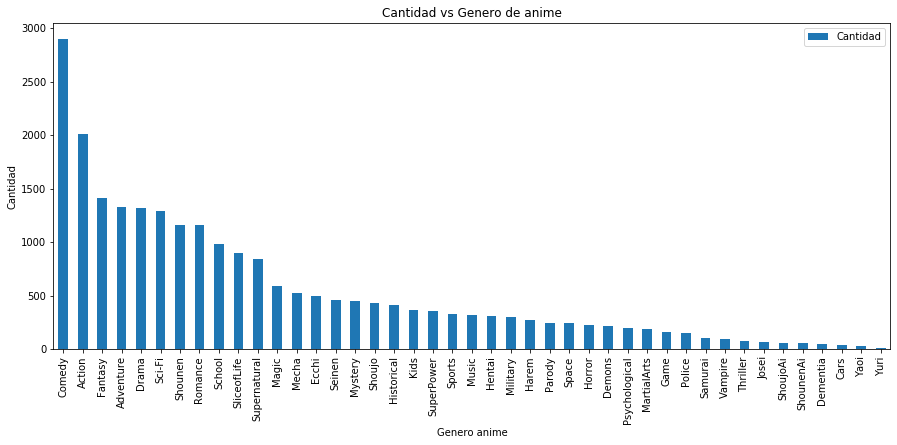

In [30]:
genreAnimeList = animeList.drop(columns = ['anime_id', 'title', 'type', 'source','episodes','score','scored_by','members','favorites','duration_min','airing','rating','related','studio','aired_initial_year','aired_final_year'])

diccGenereSum = {}

for columns in genreAnimeList.columns:
    listOfColumn = animeList[columns].tolist()
    diccGenereSum[columns] = sum(listOfColumn)

dataFrameGenereSum  = pd.DataFrame(diccGenereSum.values(), columns=['Cantidad'])
dataFrameGenereSum.index = list(diccGenereSum.keys())
dataFrameGenereSum = dataFrameGenereSum.sort_values(by=['Cantidad'],ascending = False)

dataFrameGenereSum.plot.bar(figsize =(15,6))
plt.xlabel('Genero anime')
plt.ylabel('Cantidad')
plt.title('Cantidad vs Genero de anime')
plt.show()

Se puede apreciar como hay una clara preferencia por el genero de comedia, luego sería interesante estudiar correlaciones que pueden existir del genero comedia y otros. Y observar el comportamiento a traves del tiempo de los generos, con el fin de buscar como han cambiado el anime. También surge el interes de estudiar los generos versus la columna members y favorite para comprender que prefiere la gente versus lo que ha sido ofrecido en la industria.

Ahora veamos cual es la distribución de los tipos de transmision del anime

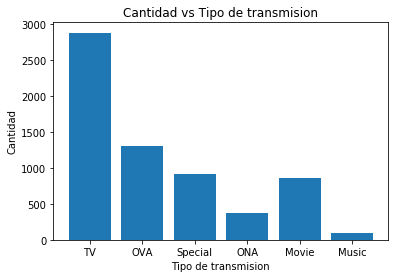

In [31]:
typeAnimeList = animeList['type'].tolist()

diccToPlot = {}

for typeAnime in typeAnimeList:
    if(not typeAnime in diccToPlot):
        diccToPlot[typeAnime] = 0
    diccToPlot[typeAnime] += 1

plt.bar(range(len(diccToPlot)), list(diccToPlot.values()), align='center')
plt.xticks(range(len(diccToPlot)), list(diccToPlot.keys()))
plt.xlabel('Tipo de transmision')
plt.ylabel('Cantidad')
plt.title('Cantidad vs Tipo de transmision')
plt.show()

Como se puede apreciar la mayoria del anime, con harta diferencia, esta pensado para ser transmitido por TV. 

Ahora observemos la distribución del source de un anime.

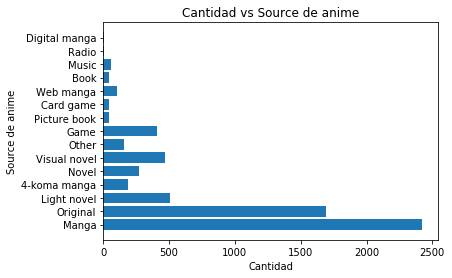

In [32]:
typeAnimeList = animeList['source'].tolist()

diccToPlot = {}

for typeAnime in typeAnimeList:
    if(not typeAnime in diccToPlot):
        diccToPlot[typeAnime] = 0
    diccToPlot[typeAnime] += 1

    
    

plt.barh(range(len(diccToPlot)), list(diccToPlot.values()), align='center')
plt.yticks(range(len(diccToPlot)), list(diccToPlot.keys()))
plt.xlabel('Cantidad')
plt.ylabel('Source de anime')
plt.title('Cantidad vs Source de anime')
plt.show()

Como se puede apreciar los animes con origen en el manga son los predominantes y el que les sigue vienen siendo original.

Con estos dos graficos surgen ciertas ideas y preguntas para estudiar

* Existe una relación entre el source del anime y el tipo de transmision (esto pensando en tipos en los source que tienen pocos animes)
* Como han variado los source de anime y los tipos de transmisión a lo largo de los años

A continuación miremos la cantidad de episodios.

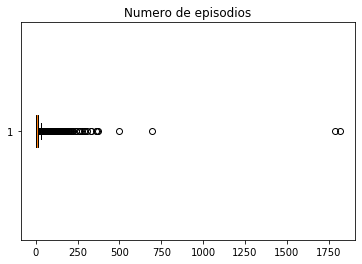

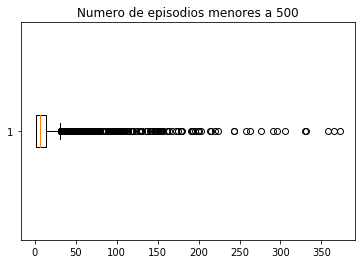

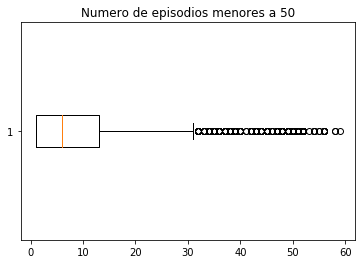

In [33]:
typeAnimeList = animeList['episodes'].tolist()
typeAnimeList = sorted(typeAnimeList)

plt.boxplot(typeAnimeList,vert = False)    
plt.title('Numero de episodios')
plt.show()


typeAnimeList = typeAnimeList[:len(typeAnimeList)-4]

plt.boxplot(typeAnimeList,vert = False)    
plt.title('Numero de episodios menores a 500')
plt.show()

typeAnimeList = typeAnimeList[:len(typeAnimeList)-170]

plt.boxplot(typeAnimeList,vert = False)    
plt.title('Numero de episodios menores a 50')
plt.show()

Ahora observemos la distribución de los tiempo de episodio

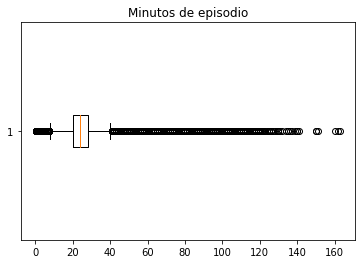

In [34]:
typeAnimeList = animeList['duration_min'].tolist()

plt.boxplot(typeAnimeList,vert = False)    
plt.title('Minutos de episodio')
plt.show()


Ahora miremos la cantidad de animes que han sido iniciados por año

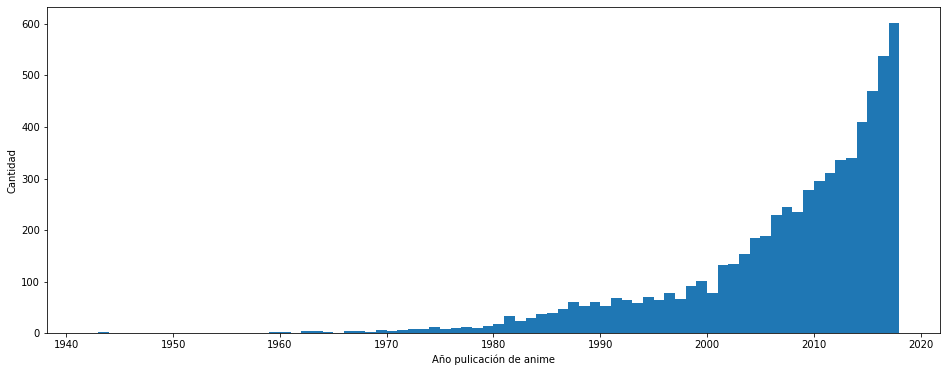

In [35]:
yearList = animeList['aired_initial_year'].tolist()

plt.figure(figsize=(16,6))
plt.hist(yearList,bins = 76)
plt.ylabel('Cantidad')
plt.xlabel('Año pulicación de anime')
plt.show()

Como se puede apreciar en los ultimos años se ha tenido un crecimiento exponencial en la cantidad de animes que han sido publicados, luego es de interes entender cuales son las tendencias que han ido apareciendo y cuales han tenido un mayor efecto en los usuarios.

Ahora observemos la distribución de los animes por los estudios.

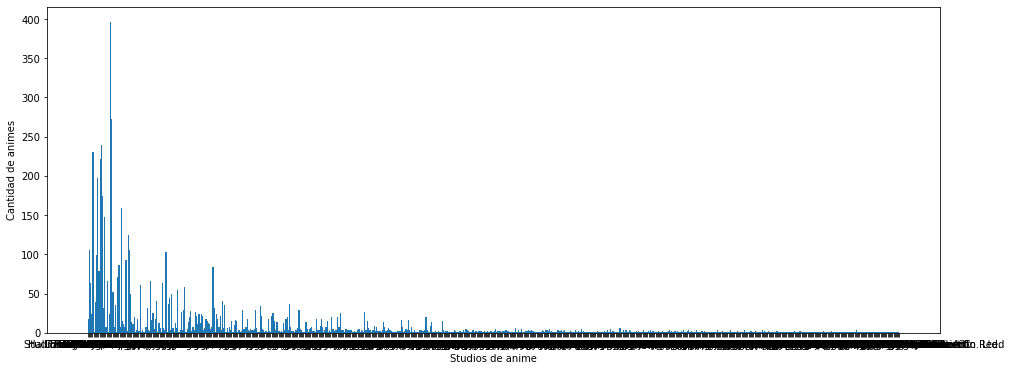

Toei Animation              396
Sunrise                     272
Madhouse                    240
J.C.Staff                   230
Studio Pierrot              222
                           ... 
Shinkuukan                    1
Animate Film, Visual 80       1
PPM                           1
Gonzo, ufotable               1
Picture Magic, Rikuentai      1
Name: Studio, Length: 690, dtype: int64

In [36]:
studioList = animeList['studio'].tolist()
uniqueSize = len(animeList['studio'].unique())


plt.figure(figsize=(16,6))
plt.hist(studioList,bins = uniqueSize)
plt.ylabel('Cantidad de animes')
plt.xlabel('Studios de anime')
plt.show()


# Tabla de frecuencias
dataFrame = pd.DataFrame(studioList,columns=['Studio'])
dataFrame = dataFrame.sort_values(by = 'Studio')
dataFrame['Studio'].value_counts()

Como se puede apreciar existen demasiados estudios de anime para observar relaciones importante en el grafico, hay algunos que tienen más distribución que las demas pero como se puede observar en la tabla de frecuencias el estudio "Toei Animation" tiene una predominancia en la cantidad de animes. Luego surge la pregunta de si existe una relación entre la popularidad y el estudio de animación y, es más, uno quiere preguntarse si posible predecir la popularidad de un anime teniendo en cuenta el estudio por el que fue hecho y más caracteristicas que pueden estar presentes.

### User Anime List

### User List

In [108]:
userList.describe()

,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,stats_mean_score,stats_rewatched,stats_episodes
count,1.087050e+05,108705.000000,108705.000000,108705.000000,108705.000000,108705.000000,108705.000000,108705.000000,108705.000000,108705.000000
mean,1.817701e+06,14.767453,196.462012,11.388280,11.733950,75.579596,61.915104,7.747605,14.198372,3779.946074
std,1.998272e+06,32.747425,244.950891,30.831647,30.979778,178.658230,59.213037,1.451397,55.378247,3678.416095
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.500694,0.000000,0.000000,7.000000
25%,1.994320e+05,3.000000,50.000000,0.000000,0.000000,6.000000,21.065278,7.330000,0.000000,1269.000000
50%,5.675050e+05,7.000000,123.000000,4.000000,3.000000,27.000000,46.195139,7.890000,1.000000,2797.000000
75%,3.477065e+06,16.000000,254.000000,12.000000,12.000000,81.000000,84.462500,8.460000,10.000000,5136.000000
max,7.251737e+06,2934.000000,5479.000000,2562.000000,2457.000000,12051.000000,952.654595,10.000000,9404.000000,62347.000000


De esta tabla se puede apreciar que el promedio de animes que se estan viendo es de 14 mientras la media es 7. Esto quiere decir que existen personas que se escapan mucho (outliers) de los datos, podría ser interesante entender que tipos de animes se suelen ver en genral y observar que sucede con los casos outiers. Por otro lado se puede apreciar como en promedio se usan 61 dias de anime y en promedio se ven 3779 capitulos, luego sería interesante ver si existe una correlación o si es posible predcir la cantidad de episodios que ha visto una persona en base a estos datos anteriores. Otro detalle importante es que se observa en la mitad de los cosas no se vuelve a ver el anime o solo se vuelve a ver una vez, luego puede ser interesante entender los animes / usuarios que son mas propensos a volver a ver un anime.

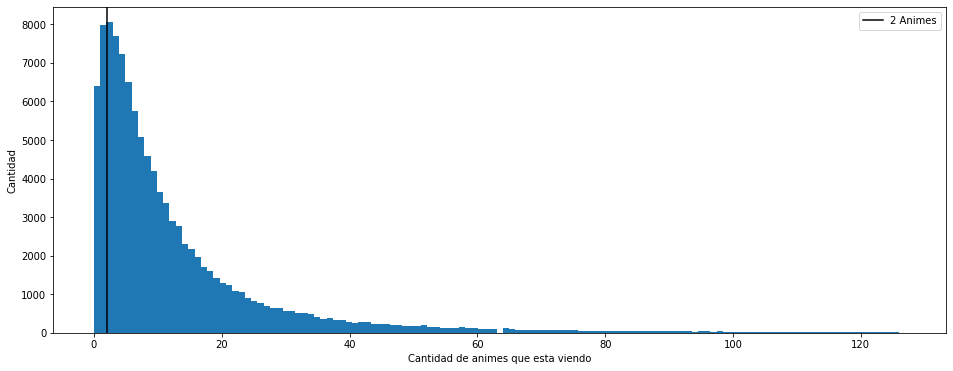

In [128]:
viewingList = userList['user_watching'].tolist()
viewingList = sorted(yearList)[:len(viewingList)-1000]

plt.figure(figsize=(16,6))
plt.hist(viewingList,bins = 129)
plt.axvline(x=2,color='black',label='2 Animes')
plt.legend()
plt.ylabel('Cantidad')
plt.xlabel('Cantidad de animes que esta viendo')
plt.show()

Como se puede apreciar la mayoria de las personas ven 2 animes a la vez, y el numero empieza a decrecer exponencialmente. Luego un problema interesante a resolver es si es posible predecir la cantidad de animes que una persona esta viendo actualmente dado los que ya ha visto o si exsite una correlación entre la cantidad de animes que esta viendo y algún atributo. También notamos que existe un número no menor de personas que no ha visto nigún anime, y luego no genera niguna información al estudio y entonces podrían no considerarse en los datos para los siguientes hitos.

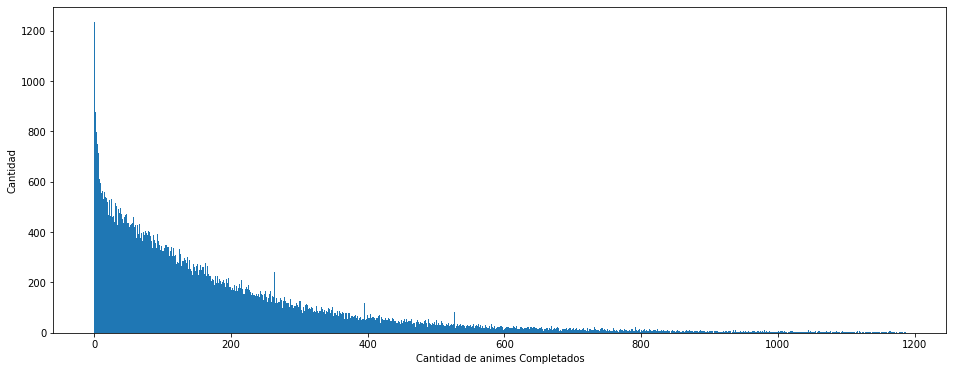

In [134]:
completedList = userList['user_completed'].tolist()
completedList = sorted(completedList)[:len(completedList)-1000]

plt.figure(figsize=(16,6))
plt.hist(completedList,bins = 1178)
plt.ylabel('Cantidad')
plt.xlabel('Cantidad de animes Completados')
plt.show()

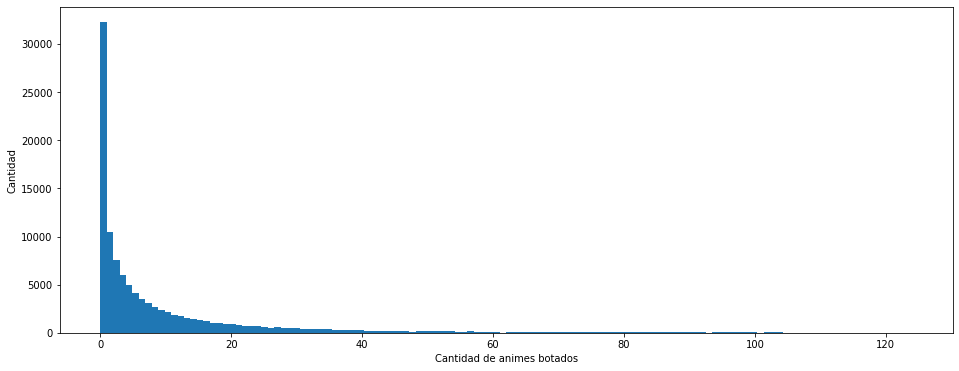

In [142]:
droppedList = userList['user_dropped'].tolist()
droppedList = sorted(droppedList)[:len(droppedList)-1000]

plt.figure(figsize=(16,6))
plt.hist(droppedList,bins = 126)
plt.ylabel('Cantidad')
plt.xlabel('Cantidad de animes botados')
plt.show()

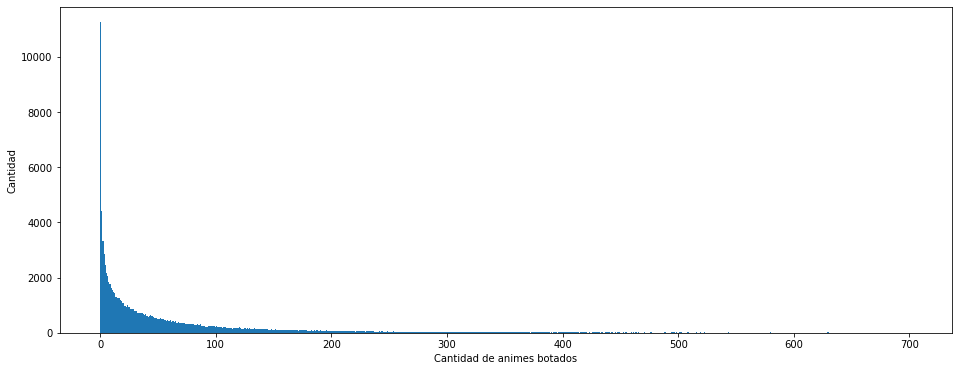

In [145]:
planWatchList = userList['user_plantowatch'].tolist()
planWatchList = sorted(planWatchList)[:len(planWatchList)-1000]

plt.figure(figsize=(16,6))
plt.hist(planWatchList,bins = 702)
plt.ylabel('Cantidad')
plt.xlabel('Cantidad de animes planeados por ver')
plt.show()

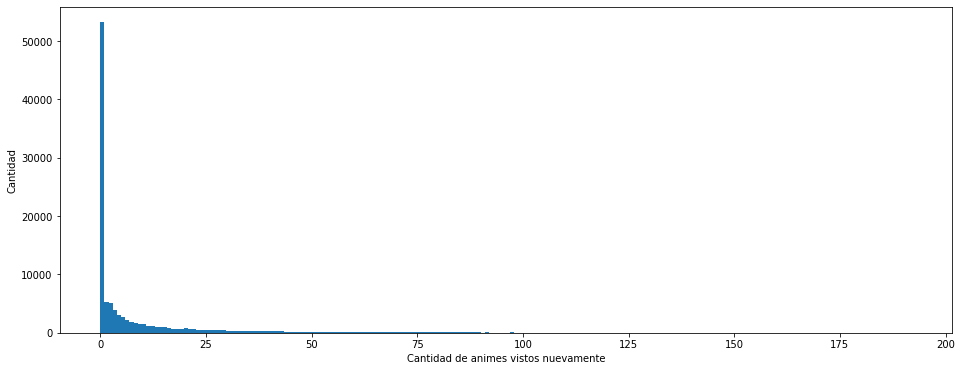

In [169]:
rewatched = userList['stats_rewatched'].tolist()
rewatched = sorted(rewatched)[:len(rewatched)-1000]

plt.figure(figsize=(16,6))
plt.hist(rewatched,bins = 194)
plt.ylabel('Cantidad')
plt.xlabel('Cantidad de animes vistos nuevamente')
plt.show()

Como se puede apreciar las columnas "user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,stats_rewatched" tiene un decrecimiento logaritmico similar, luego la pregunta de si estas columnas estan realcionadas o si es posible predecir una a partir de la otra surge con fuerza.

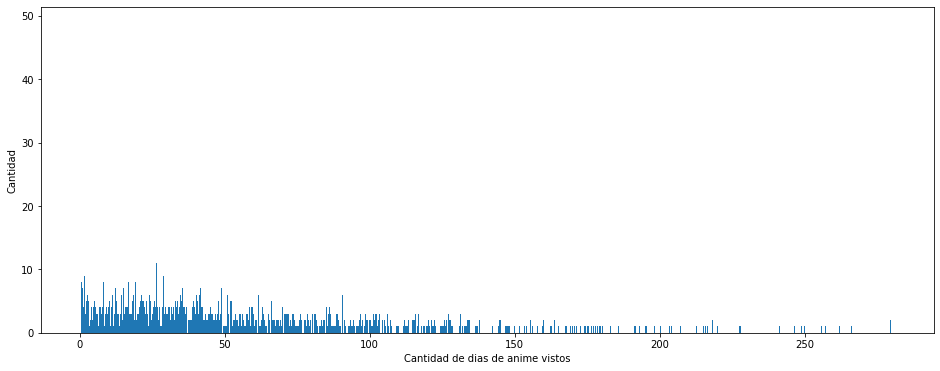

In [152]:
daysWatchedList = userList['user_days_spent_watching'].tolist()
daysWatchedList = sorted(daysWatchedList)[:len(daysWatchedList)-1000]

plt.figure(figsize=(16,6))
plt.hist(daysWatchedList,bins = 84432)
plt.ylabel('Cantidad')
plt.xlabel('Cantidad de dias de anime vistos')
plt.show()

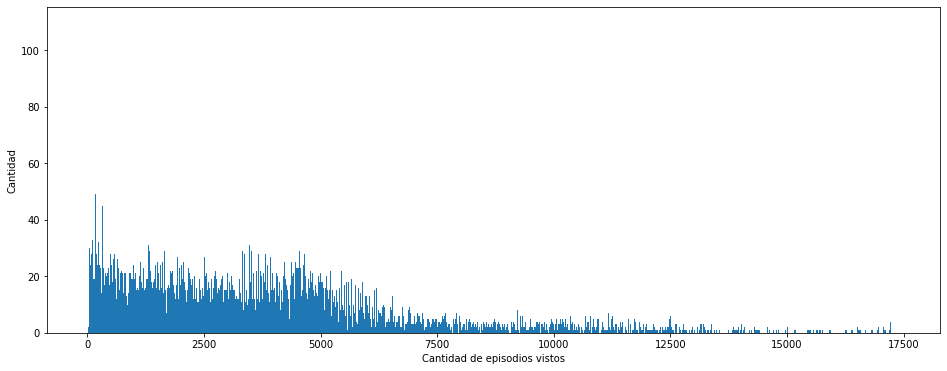

In [170]:
rewatched = userList['stats_episodes'].tolist()
rewatched = sorted(rewatched)[:len(rewatched)-1000]

plt.figure(figsize=(16,6))
plt.hist(rewatched,bins = 13341)
plt.ylabel('Cantidad')
plt.xlabel('Cantidad de episodios vistos')
plt.show()

Notamos que la cantidad de dias de anime vistos y la cantidad de episoidos vistos no pareciera tener un patron fijo, luego sería interesante intentar hacer predicciones.

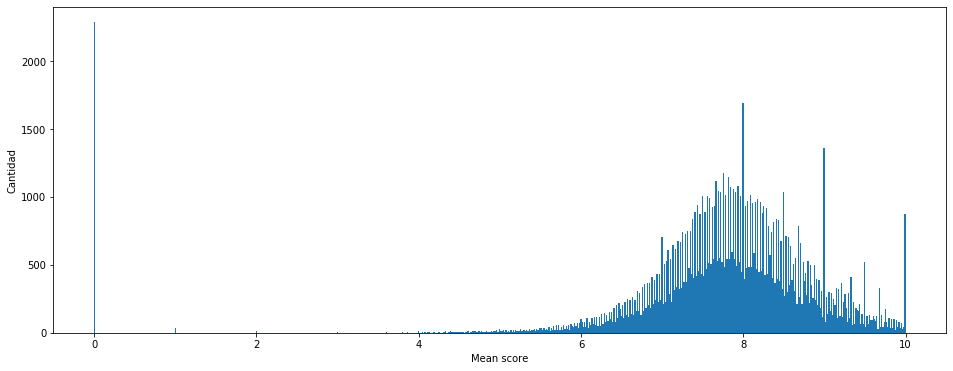

In [159]:
meanScore = userList['stats_mean_score'].tolist()
meanScore = sorted(meanScore)[:len(meanScore)-1000]

plt.figure(figsize=(16,6))
plt.hist(meanScore,bins = 661)
plt.ylabel('Cantidad')
plt.xlabel('Mean score')
plt.show()

Notamos como el scroe de los aniumes cumple lo que parece ser una curva gaussiana, luego sería interesante hacer un estudio estadistico para entender esta curva y ver si es posible hacer ciertas predicciones a partir de otro valor.

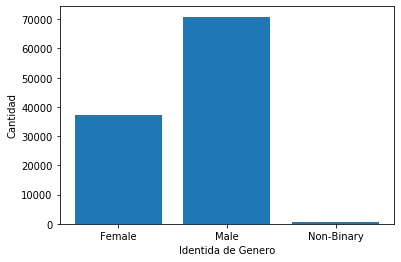

In [172]:
userGender = userList['gender'].tolist()

diccToPlot = {}

for gender in userGender:
    if(not gender in diccToPlot):
        diccToPlot[gender] = 0
    diccToPlot[gender] += 1

plt.bar(range(len(diccToPlot)), list(diccToPlot.values()), align='center')
plt.xticks(range(len(diccToPlot)), list(diccToPlot.keys()))
plt.xlabel('Identida de Genero')
plt.ylabel('Cantidad')
plt.show()

Como se puede apreciar existe una diferencia entre la cantida de usuarios que se identifican como hombre, mujer y no binario. Luego surge el interes de entender las distribuciones de los atributos mostrados en función de la identidad de genero del usuario.